In [2]:
#@title Setup (Do NOT modify)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/final
!pip install openai-clip

Mounted at /content/drive
/content/drive/MyDrive/final
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.6 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368604 sha256=949a365f79c9732aed99b54fb39cf196b8483f4106110454c0129adffefefc2c
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip


In [ ]:
#@title Data preprocessing (Train)
!python preproc_datasets_celeba_zip_train.py --source=./multimodal_celeba_hq.zip --dest train_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

Traceback (most recent call last):
  File "/content/drive/MyDrive/final/preproc_datasets_celeba_zip_train.py", line 592, in <module>
    convert_dataset()  # pylint: disable=no-value-for-parameter
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/decorators.py", line 33, in new_func
    return f(get_current_context(), *args, **kwargs)
  File "/content/drive/MyDrive/final/preproc_datasets_celeba_zip_train.py", line 467, in convert_dataset
    for idx, image in tqdm(enumerate(input_iter), total=num_f

In [ ]:
#@title Data preprocessing (Test)
!python preproc_datasets_celeba_zip_test.py --source=./multimodal_celeba_hq.zip --dest test_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

Traceback (most recent call last):
  File "/content/drive/MyDrive/final/preproc_datasets_celeba_zip_test.py", line 592, in <module>
    convert_dataset()  # pylint: disable=no-value-for-parameter
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/decorators.py", line 33, in new_func
    return f(get_current_context(), *args, **kwargs)
  File "/content/drive/MyDrive/final/preproc_datasets_celeba_zip_test.py", line 467, in convert_dataset
    for idx, image in tqdm(enumerate(input_iter), total=num_fil

In [ ]:
#@title Train

train_data = "train_data_4cap.zip"#@param {"type": "string"}
batch_size = 10 #@param {"type": "integer"}
num_epochs = 5 #@param {"type": "integer"}
learning_rate = 0.00017 #@param {"type": "number"}
report_interval = 50 #@param {"type": "integer"}
noise_dim = 100 #@param {"type": "integer"}
projection_dim = 128 #@param {"type": "integer"}
clip_embedding_dim = 512 #@param {"type": "integer"}
checkpoint_path = "model_exp3" #@param {"type": "string"}
result_path = "images_exp3" #@param {"type": "string"}
use_uncond_loss = True #@param {"type": "boolean"}
use_contrastive_loss = True #@param {"type": "boolean"}
num_stage = 3 #@param {"type": "integer"}
resume_checkpoint_path = "None" #@param {"type": "string"}
resume_epoch = -1 #@param {"type": "integer"}

test_cmd = f'''python main.py \
    --train_data "{train_data}" \
    --batch_size {batch_size} \
    --num_epochs {num_epochs} \
    --learning_rate {learning_rate} \
    --report_interval {report_interval} \
    --noise_dim {noise_dim} \
    --projection_dim {projection_dim} \
    --clip_embedding_dim {clip_embedding_dim} \
    --checkpoint_path "{checkpoint_path}" \
    --result_path "{result_path}" \
    --num_stage {num_stage} \
    --resume_epoch {resume_epoch} \
    '''
if use_uncond_loss:
    test_cmd += "--use_uncond_loss "
if use_contrastive_loss:
    test_cmd += "--use_contrastive_loss "
if resume_checkpoint_path != "None":
    test_cmd += f'''--resume_checkpoint_path "{resume_checkpoint_path}"'''

with open('./train_script.sh', 'w') as file:
    file.write(test_cmd)

!bash train_script.sh

Loading dataset
finish
Epoch: 0 start
    Iteration 50 	 d_loss: 0.8915, g_loss: 43.3616
    Iteration 100 	 d_loss: 1.0494, g_loss: 39.9821
    Iteration 150 	 d_loss: 0.5176, g_loss: 31.6367
    Iteration 200 	 d_loss: 0.3402, g_loss: 19.3981
    Iteration 250 	 d_loss: 0.3307, g_loss: 13.7664
    Iteration 300 	 d_loss: 3.5719, g_loss: 21.1247
    Iteration 350 	 d_loss: 0.5775, g_loss: 17.3591
    Iteration 400 	 d_loss: 4.3788, g_loss: 6.8456
    Iteration 450 	 d_loss: 0.8248, g_loss: 17.9209
    Iteration 500 	 d_loss: 2.0807, g_loss: 19.7827
    Iteration 550 	 d_loss: 2.9489, g_loss: 14.3944
    Iteration 600 	 d_loss: 1.5236, g_loss: 19.2520
    Iteration 650 	 d_loss: 1.5735, g_loss: 15.0249
    Iteration 700 	 d_loss: 0.8535, g_loss: 12.8796
    Iteration 750 	 d_loss: 4.0650, g_loss: 17.1545
    Iteration 800 	 d_loss: 1.2726, g_loss: 11.6989
    Iteration 850 	 d_loss: 1.2805, g_loss: 10.3817
    Iteration 900 	 d_loss: 1.6120, g_loss: 14.2960
    Iteration 950 	 d_loss: 

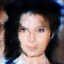

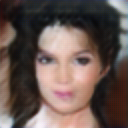

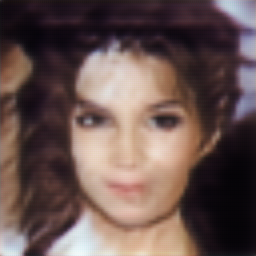

In [10]:
#@title Test (Generate image)

prompt = "The woman is young and has blond hair, and arched eyebrows."#@param {"type": "string"}
load_epoch = 4 #@param {"type": "integer"}
checkpoint_path = "model_exp1" #@param {"type": "string"}

test_cmd = f'''python generate_image.py \
    --prompt "{prompt}" \
    --load_epoch {load_epoch} \
    --checkpoint_path "{checkpoint_path}"
    '''

with open('./test_script.sh', 'w') as file:
    file.write(test_cmd)

!bash test_script.sh


from IPython.display import Image
import os
img_64 = Image(os.path.join("result_64.png"))
display(img_64)
img_128 = Image(os.path.join("result_128.png"))
display(img_128)
img_256 = Image(os.path.join("result_256.png"))
display(img_256)